Import the required dependences 

In [1]:
import  pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing  import  MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder , LabelEncoder


load the dataset

In [4]:
heart_data = pd.read_csv('heart_disease.csv')   

In [5]:
heart_data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [ ]:
# info about the data
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [ ]:
print(heart_data.shape) # number of row and columns

(10000, 21)


In [11]:
# checking for sum of missing values 
print(heart_data.isnull().sum())

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


In [12]:
# the lists of columns 
print(heart_data.columns)

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')


In [15]:
# Statistical summary of the data
heart_data.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [13]:
# checking for missing values 
print(heart_data.isnull().sum())

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


In [ ]:
heart_data.value_counts('Heart Disease Status') # checking the balance of the target variable

Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64

# Visualized to get some key inside of the data 

In [ ]:
# Convert columns with  yes/no categorical values to 1/0
binary_cols = [
    'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure',
    'Low HDL Cholesterol', 'High LDL Cholesterol', 'Heart Disease Status'
]

for col in binary_cols:
    heart_data[col] = heart_data[col].map({'Yes': 1, 'No': 0})


In [19]:
heart_data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,1.0,1.0,0.0,24.991591,1.0,...,0.0,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,0
1,69.0,Female,146.0,286.0,High,0.0,1.0,1.0,25.221799,0.0,...,0.0,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,0
2,46.0,Male,126.0,216.0,Low,0.0,0.0,0.0,29.855447,0.0,...,1.0,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,0
3,32.0,Female,122.0,293.0,High,1.0,1.0,0.0,24.130477,1.0,...,1.0,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,0
4,60.0,Male,166.0,242.0,Low,1.0,1.0,1.0,20.486289,1.0,...,0.0,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,0


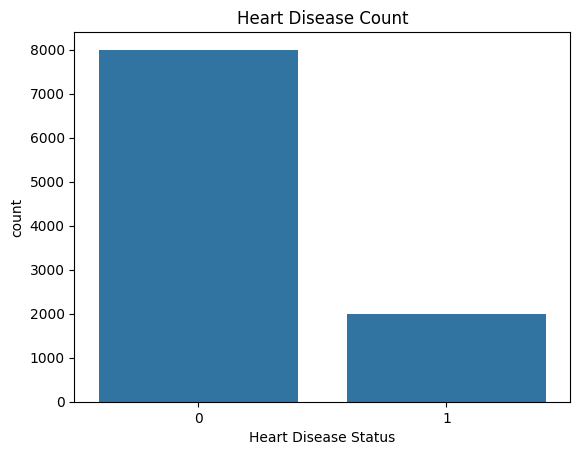

In [ ]:
#Check the Target Variable Balance We need to see how many people have Heart Disease Status = Yes vs No. Plot Bar chart (countplot)  If one class is much smaller than the other, the model may become biased.
sns.countplot(x='Heart Disease Status', data=heart_data)
plt.title("Heart Disease Count")
plt.show()

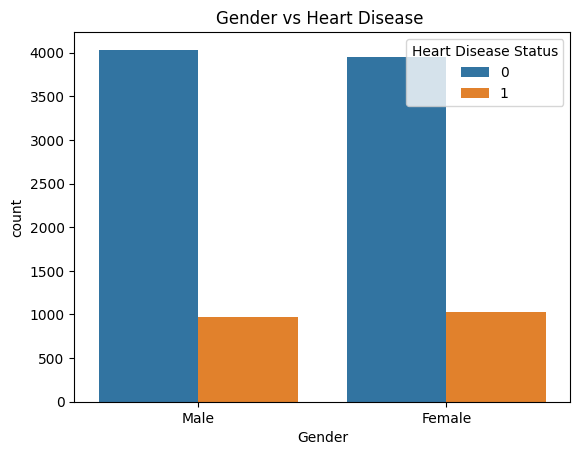

In [22]:
#Look at Gender vs Heart Disease  Heart disease often varies by gender. Plot: Bar chart (Gender on x-axis, count of Heart Disease) Why: To see if disease frequency differs across gender.
sns.countplot(x='Gender', hue='Heart Disease Status', data=heart_data)
plt.title('Gender vs Heart Disease ')
plt.show()